In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston_db = pd.read_csv('boston_housing.csv')

# Exploring the data

In [3]:
boston_db.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
boston_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
boston_db[['RM', 'MEDV']].head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


# Plotting RM vs MEDV

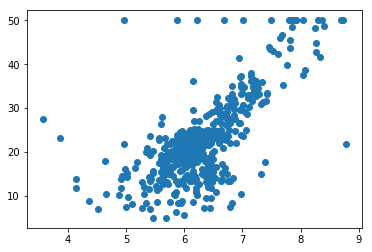

In [6]:
plt.scatter(boston_db['RM'], boston_db['MEDV'])

(4.0, 9.0) (0.0, 53.0)


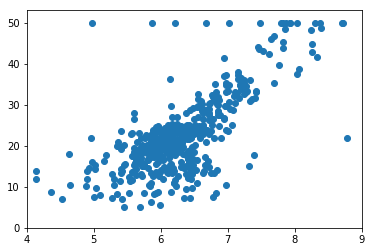

In [7]:
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.ylim(ymin * 5, ymax * 53)
plt.xlim(xmin + 4, xmax * 9)
print(plt.xlim(), plt.ylim())
plt.scatter(boston_db['RM'], boston_db['MEDV'])

# Training the model

In [8]:
X = boston_db[['RM']]
y = boston_db['MEDV']

In [9]:
print(X.head())
print(y.head())

      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('Coefficient:', model.coef_, 'Intercept: ', model.intercept_)

Coefficient: [9.59285696] Intercept:  -37.560979853926824


In [14]:
model0 = model.intercept_ + model.coef_*boston_db.RM

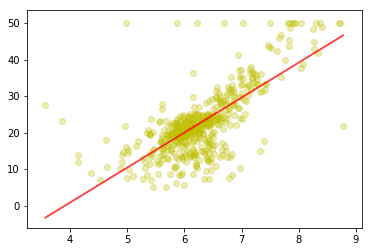

In [15]:
plt.plot(boston_db.RM, model0, c='r', alpha=0.7)
plt.scatter(boston_db.RM, boston_db.MEDV, c='y', alpha=0.3)

In [16]:
ObvModel = pd.DataFrame({'RM': boston_db['RM'],
                         'MEDV': boston_db['MEDV'],
                         'Predicted MEDV': model0,
                         'Error': model0 - boston_db['MEDV'] })
ObvModel.head()

,RM,MEDV,Predicted MEDV,Error
0,6.575,24.0,25.512055,1.512055
1,6.421,21.6,24.034755,2.434755
2,7.185,34.7,31.363697,-3.336303
3,6.998,33.4,29.569833,-3.830167
4,7.147,36.2,30.999169,-5.200831


# Evaluation

In [17]:
SST = sum((boston_db.MEDV - boston_db.MEDV.mean())**2)
SST

42716.29541501979

In [18]:
SSE = sum((ObvModel.Error)**2)
SSE

22140.926946387364

In [19]:
SSR = SST -SSE
SSR

20575.368468632427

In [20]:
Rsq = SSR/SST
Rsq

0.48167492683360763

In [21]:
Rsq1 = model.score(boston_db[["RM"]],y)
Rsq1

0.481674926833607

# Removing Outliers

In [22]:
# calculate interquartile range
q25, q75 = np.percentile(X, 25), np.percentile(X, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower, upper)

Percentiles: 25th=5.886, 75th=6.623, IQR=0.738
4.778500000000001 7.730499999999999


In [23]:
# identify outliers
outliers = [x for x in boston_db.RM if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 30


In [24]:
# remove outliers
outliers_removed = [x for x in boston_db.RM if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 476


In [25]:
len([n for n in boston_db.RM if n in outliers_removed ])

476

In [32]:
boston_db_or = boston_db[boston_db.RM >= lower]

In [33]:
boston_db_or = boston_db[boston_db.RM <= upper]

In [34]:
len(boston_db)

506

In [39]:
len(boston_db_or)

484

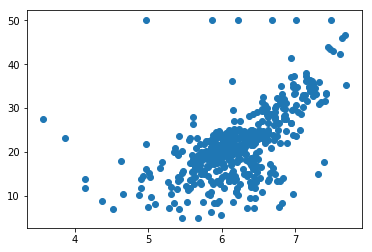

In [41]:
plt.scatter(boston_db_or['RM'], boston_db_or['MEDV'])

In [42]:
X = boston_db_or[['RM']]
y = boston_db_or['MEDV']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [44]:
model_or = LinearRegression()

In [45]:
model_or.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print('Coefficient:', model.coef_, 'Intercept: ', model.intercept_)

Coefficient: [9.59285696] Intercept:  -37.560979853926824
